# Visualize the convergence time scales (Experiment 2)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Plot convergence time scales for single and two agent setting

In [2]:
def plot_convergence_time_scales():
    """ Plots the convergence time scales calculated in Experiment 2. 
        The rewards over time are plotted for the two different games: the single agent setting and the two agent
        setting (rows) and the two different types of input distribution: uniform and Zipf (columns).
        The plot shows average rewards together with the range from minimal to maximal values. 
    """
    fig = plt.figure(figsize=(15,10))
    
    for i, task in enumerate(['labeling', 'communication']):
        
        # number of epochs to be plotted
        epochs = [60, 300][i]
        
        for j, state_dist in enumerate(['uniform', 'Zipf']):
            
            filepath = 'data/' + task
            if state_dist == 'Zipf':
                filepath = filepath + '_Zipf'
            filepath = filepath + '/'
            
            ax = fig.add_subplot(2,2,2*i+j+1)
            
            colors = ['r', 'b']
            for a, agent in enumerate([['L0', 'L1'], ['L0_S0', 'L1_S1']][i]):
                
                file = filepath + agent +  ['/SGD_10_states/', '/SGD_10_states_5.0alpha/'][a]

                rewards = []
                # load rewards
                for run in range(50):
                    rewards.append(np.load(file + 'rewards_'+str(run)+'.npy'))

                rewards = np.array(rewards)
                rewards_mean = np.mean(rewards, axis=0)
                rewards_min = np.min(rewards, axis=0)
                rewards_max = np.max(rewards, axis=0)

                ax.plot(rewards_mean[:epochs], color=colors[a])
                ax.fill_between(range(epochs), rewards_min[:epochs], rewards_mean[:epochs], 
                                 alpha=.15, color=colors[a])
                ax.fill_between(range(epochs), rewards_mean[:epochs], rewards_max[:epochs], 
                                 alpha=.15, color=colors[a])

            plt.xlabel('epoch\n ', fontsize=25)
            plt.xticks(fontsize=20)
            plt.yticks([0,1],fontsize=20)
            plt.legend(['literal','pragmatic'], fontsize=25, loc='lower right')
            
            if i==0 and j==0: 
                plt.title('uniform\n ', fontsize=25)
            elif i==0 and j==1: 
                plt.title('Zipf\n ', fontsize=25)
                
            if i==0 and j==0: 
                plt.ylabel('single agent \n \n mean reward', fontsize=25)
            elif i==1 and j==0: 
                plt.ylabel('two agent \n \n mean reward', fontsize=25)
            else: 
                plt.ylabel('mean reward', fontsize=25)
            
            fig.tight_layout()
            

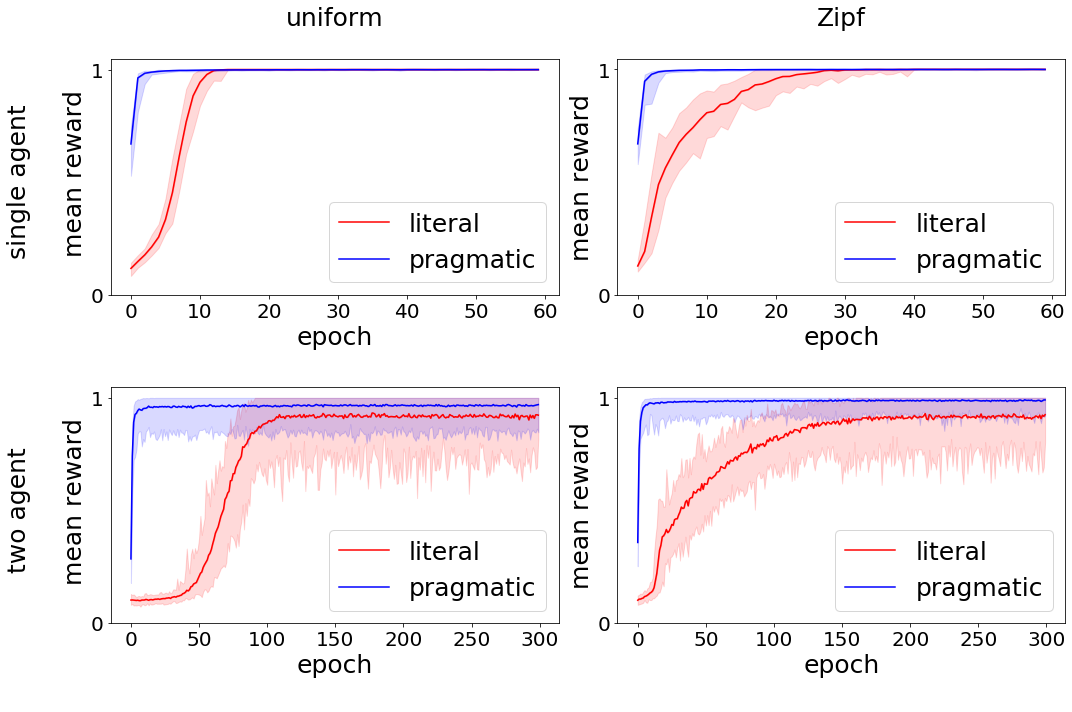

In [3]:
plot_convergence_time_scales()